# 베스트 모델 만들기 - 와인 사례
## 다중 분류
## 화이트 와인의 등급 맞추기

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# 데이터 입력
df = pd.read_csv('dataset/wine.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
# 화이트 와인만 선택
df = df[df[12].isin([0])]

In [5]:
df[11].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: 11, dtype: int64

In [6]:
dataset = df.values
X = dataset[:,0:11]
Y_tmp = dataset[:,11]

In [7]:
# One-hot-encoding
from tensorflow.keras.utils import to_categorical
Y = to_categorical(Y_tmp, 11)

In [8]:
Y[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

## 3개층(32, 24, 11)으로 한 경우

In [9]:
# 모델 설정
model = Sequential([
    Dense(32, input_dim=11, activation='relu'),
    Dense(24, activation='relu'),
    Dense(11, activation='softmax')
]) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                792       
_________________________________________________________________
dense_2 (Dense)              (None, 11)                275       
Total params: 1,451
Trainable params: 1,451
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 모델 컴파일 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
# 모델 저장 폴더 설정
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [12]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "white{epoch:03d}-{val_loss:.4f}.hdf5"

checkpointer_callback = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [13]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [14]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.3, epochs=3500, batch_size=500,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer_callback])


Epoch 00001: val_loss improved from inf to 7.92118, saving model to ./model/white001-7.9212.hdf5

Epoch 00002: val_loss improved from 7.92118 to 4.68935, saving model to ./model/white002-4.6894.hdf5

Epoch 00003: val_loss improved from 4.68935 to 3.84565, saving model to ./model/white003-3.8456.hdf5

Epoch 00004: val_loss improved from 3.84565 to 2.74111, saving model to ./model/white004-2.7411.hdf5

Epoch 00005: val_loss improved from 2.74111 to 2.54937, saving model to ./model/white005-2.5494.hdf5

Epoch 00006: val_loss improved from 2.54937 to 2.37625, saving model to ./model/white006-2.3762.hdf5

Epoch 00007: val_loss improved from 2.37625 to 2.32497, saving model to ./model/white007-2.3250.hdf5

Epoch 00008: val_loss improved from 2.32497 to 2.15227, saving model to ./model/white008-2.1523.hdf5

Epoch 00009: val_loss improved from 2.15227 to 2.01004, saving model to ./model/white009-2.0100.hdf5

Epoch 00010: val_loss improved from 2.01004 to 1.91948, saving model to ./model/white


Epoch 00127: val_loss did not improve from 1.15184

Epoch 00128: val_loss did not improve from 1.15184

Epoch 00129: val_loss did not improve from 1.15184

Epoch 00130: val_loss did not improve from 1.15184

Epoch 00131: val_loss improved from 1.15184 to 1.14826, saving model to ./model/white131-1.1483.hdf5

Epoch 00132: val_loss did not improve from 1.14826

Epoch 00133: val_loss did not improve from 1.14826

Epoch 00134: val_loss did not improve from 1.14826

Epoch 00135: val_loss improved from 1.14826 to 1.14453, saving model to ./model/white135-1.1445.hdf5

Epoch 00136: val_loss did not improve from 1.14453

Epoch 00137: val_loss did not improve from 1.14453

Epoch 00138: val_loss did not improve from 1.14453

Epoch 00139: val_loss did not improve from 1.14453

Epoch 00140: val_loss improved from 1.14453 to 1.14319, saving model to ./model/white140-1.1432.hdf5

Epoch 00141: val_loss did not improve from 1.14319

Epoch 00142: val_loss did not improve from 1.14319

Epoch 00143: val_


Epoch 00279: val_loss did not improve from 1.10285

Epoch 00280: val_loss did not improve from 1.10285

Epoch 00281: val_loss did not improve from 1.10285

Epoch 00282: val_loss did not improve from 1.10285

Epoch 00283: val_loss did not improve from 1.10285

Epoch 00284: val_loss did not improve from 1.10285

Epoch 00285: val_loss did not improve from 1.10285

Epoch 00286: val_loss did not improve from 1.10285

Epoch 00287: val_loss did not improve from 1.10285

Epoch 00288: val_loss did not improve from 1.10285

Epoch 00289: val_loss did not improve from 1.10285

Epoch 00290: val_loss did not improve from 1.10285

Epoch 00291: val_loss did not improve from 1.10285

Epoch 00292: val_loss did not improve from 1.10285

Epoch 00293: val_loss did not improve from 1.10285

Epoch 00294: val_loss did not improve from 1.10285

Epoch 00295: val_loss did not improve from 1.10285

Epoch 00296: val_loss did not improve from 1.10285

Epoch 00297: val_loss did not improve from 1.10285

Epoch 00298


Epoch 00440: val_loss improved from 1.08681 to 1.08108, saving model to ./model/white440-1.0811.hdf5

Epoch 00441: val_loss did not improve from 1.08108

Epoch 00442: val_loss did not improve from 1.08108

Epoch 00443: val_loss did not improve from 1.08108

Epoch 00444: val_loss did not improve from 1.08108

Epoch 00445: val_loss did not improve from 1.08108

Epoch 00446: val_loss did not improve from 1.08108

Epoch 00447: val_loss did not improve from 1.08108

Epoch 00448: val_loss did not improve from 1.08108

Epoch 00449: val_loss did not improve from 1.08108

Epoch 00450: val_loss did not improve from 1.08108

Epoch 00451: val_loss did not improve from 1.08108

Epoch 00452: val_loss did not improve from 1.08108

Epoch 00453: val_loss did not improve from 1.08108

Epoch 00454: val_loss did not improve from 1.08108

Epoch 00455: val_loss did not improve from 1.08108

Epoch 00456: val_loss did not improve from 1.08108

Epoch 00457: val_loss did not improve from 1.08108

Epoch 00458: 

In [15]:
del model
model = load_model('model/white465-1.0722.hdf5')
print("\n Accuracy: %.4f" % (model.evaluate(X, Y, verbose=2)[1]))

4898/1 - 0s - loss: 0.9375 - accuracy: 0.5269

 Accuracy: 0.5269


In [16]:
# 테스트셋
y_vloss = history.history['val_loss']
y_vacc = history.history['val_accuracy']
# 학습셋
y_loss = history.history['loss']
y_acc = history.history['accuracy']

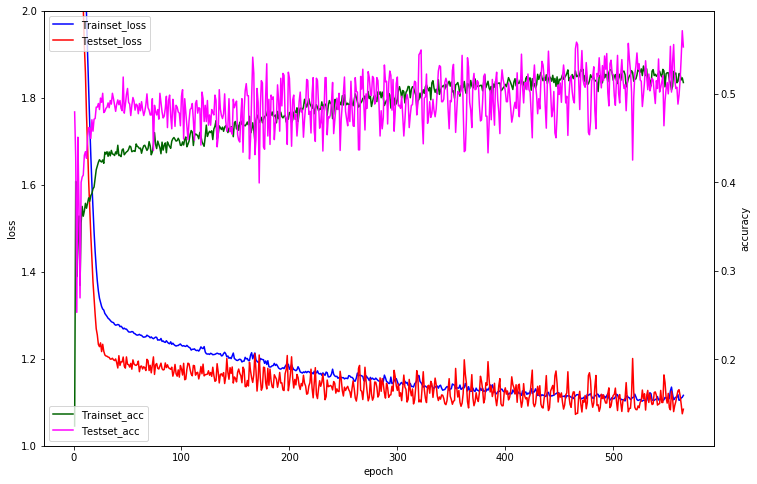

In [18]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
fig, ax0 = plt.subplots(figsize=(12,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c="blue", label='Trainset_loss')
ax0.plot(x_len, y_vloss, c="red", label='Testset_loss')
ax0.set_ylim([1,2])
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='upper left')
ax1.legend(loc='lower left')
plt.show()

#### 4개층(40, 24, 16, 11)으로 한 경우

In [19]:
# 모델 설정
model2 = Sequential([
    Dense(40, input_dim=11, activation='relu'),
    Dense(24, activation='relu'),
    Dense(16, activation='relu'),
    Dense(11, activation='softmax')
]) 
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 40)                480       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                984       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                400       
_________________________________________________________________
dense_6 (Dense)              (None, 11)                187       
Total params: 2,051
Trainable params: 2,051
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 모델 컴파일 
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "wcase2-{epoch:03d}-{val_loss:.4f}.hdf5"

checkpointer_callback2 = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [22]:
# 모델 실행 및 저장
history2 = model2.fit(X, Y, validation_split=0.3, epochs=3500, batch_size=500,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer_callback2])


Epoch 00001: val_loss improved from inf to 29.06378, saving model to ./model/wcase2-001-29.0638.hdf5

Epoch 00002: val_loss improved from 29.06378 to 17.72273, saving model to ./model/wcase2-002-17.7227.hdf5

Epoch 00003: val_loss improved from 17.72273 to 8.42983, saving model to ./model/wcase2-003-8.4298.hdf5

Epoch 00004: val_loss improved from 8.42983 to 3.59712, saving model to ./model/wcase2-004-3.5971.hdf5

Epoch 00005: val_loss improved from 3.59712 to 1.97276, saving model to ./model/wcase2-005-1.9728.hdf5

Epoch 00006: val_loss improved from 1.97276 to 1.71526, saving model to ./model/wcase2-006-1.7153.hdf5

Epoch 00007: val_loss improved from 1.71526 to 1.52074, saving model to ./model/wcase2-007-1.5207.hdf5

Epoch 00008: val_loss improved from 1.52074 to 1.39247, saving model to ./model/wcase2-008-1.3925.hdf5

Epoch 00009: val_loss improved from 1.39247 to 1.37988, saving model to ./model/wcase2-009-1.3799.hdf5

Epoch 00010: val_loss did not improve from 1.37988

Epoch 000


Epoch 00119: val_loss did not improve from 1.13292

Epoch 00120: val_loss did not improve from 1.13292

Epoch 00121: val_loss improved from 1.13292 to 1.12788, saving model to ./model/wcase2-121-1.1279.hdf5

Epoch 00122: val_loss did not improve from 1.12788

Epoch 00123: val_loss did not improve from 1.12788

Epoch 00124: val_loss did not improve from 1.12788

Epoch 00125: val_loss did not improve from 1.12788

Epoch 00126: val_loss did not improve from 1.12788

Epoch 00127: val_loss did not improve from 1.12788

Epoch 00128: val_loss did not improve from 1.12788

Epoch 00129: val_loss did not improve from 1.12788

Epoch 00130: val_loss did not improve from 1.12788

Epoch 00131: val_loss did not improve from 1.12788

Epoch 00132: val_loss did not improve from 1.12788

Epoch 00133: val_loss did not improve from 1.12788

Epoch 00134: val_loss did not improve from 1.12788

Epoch 00135: val_loss improved from 1.12788 to 1.12613, saving model to ./model/wcase2-135-1.1261.hdf5

Epoch 00136

Epoch 00264: val_loss did not improve from 1.06214

Epoch 00265: val_loss did not improve from 1.06214

Epoch 00266: val_loss did not improve from 1.06214

Epoch 00267: val_loss did not improve from 1.06214

Epoch 00268: val_loss did not improve from 1.06214

Epoch 00269: val_loss did not improve from 1.06214

Epoch 00270: val_loss did not improve from 1.06214

Epoch 00271: val_loss did not improve from 1.06214

Epoch 00272: val_loss did not improve from 1.06214

Epoch 00273: val_loss did not improve from 1.06214

Epoch 00274: val_loss did not improve from 1.06214

Epoch 00275: val_loss did not improve from 1.06214

Epoch 00276: val_loss did not improve from 1.06214

Epoch 00277: val_loss did not improve from 1.06214

Epoch 00278: val_loss did not improve from 1.06214

Epoch 00279: val_loss did not improve from 1.06214

Epoch 00280: val_loss did not improve from 1.06214

Epoch 00281: val_loss did not improve from 1.06214

Epoch 00282: val_loss did not improve from 1.06214

Epoch 00283:

Epoch 00428: val_loss did not improve from 1.04799

Epoch 00429: val_loss did not improve from 1.04799

Epoch 00430: val_loss did not improve from 1.04799

Epoch 00431: val_loss did not improve from 1.04799

Epoch 00432: val_loss did not improve from 1.04799

Epoch 00433: val_loss did not improve from 1.04799

Epoch 00434: val_loss did not improve from 1.04799

Epoch 00435: val_loss did not improve from 1.04799

Epoch 00436: val_loss did not improve from 1.04799

Epoch 00437: val_loss did not improve from 1.04799

Epoch 00438: val_loss did not improve from 1.04799

Epoch 00439: val_loss did not improve from 1.04799

Epoch 00440: val_loss did not improve from 1.04799

Epoch 00441: val_loss did not improve from 1.04799

Epoch 00442: val_loss did not improve from 1.04799

Epoch 00443: val_loss did not improve from 1.04799

Epoch 00444: val_loss did not improve from 1.04799

Epoch 00445: val_loss did not improve from 1.04799

Epoch 00446: val_loss did not improve from 1.04799

Epoch 00447:

In [23]:
del model2
model2 = load_model('model/wcase2-381-1.0480.hdf5')
print("\n Accuracy: %.4f" % (model2.evaluate(X, Y, verbose=2)[1]))

4898/1 - 0s - loss: 0.9577 - accuracy: 0.5157

 Accuracy: 0.5157


In [24]:
# 테스트셋
y_vloss = history2.history['val_loss']
y_vacc = history2.history['val_accuracy']
# 학습셋
y_loss = history2.history['loss']
y_acc = history2.history['accuracy']

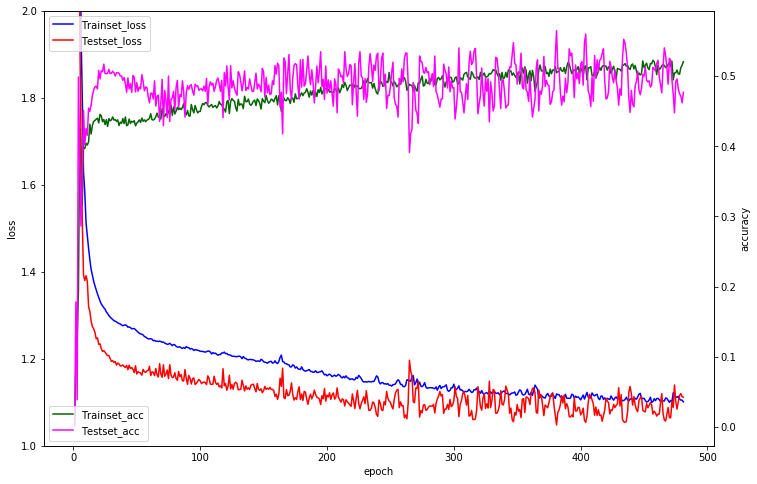

In [25]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
fig, ax0 = plt.subplots(figsize=(12,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c="blue", label='Trainset_loss')
ax0.plot(x_len, y_vloss, c="red", label='Testset_loss')
ax0.set_ylim([1,2])
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='upper left')
ax1.legend(loc='lower left')
plt.show()

## 2개층으로 한 경우(40, 11)

In [26]:
# 모델 설정
model3 = Sequential([
    Dense(40, input_dim=11, activation='relu'),
    Dense(11, activation='softmax')
]) 
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 40)                480       
_________________________________________________________________
dense_8 (Dense)              (None, 11)                451       
Total params: 931
Trainable params: 931
Non-trainable params: 0
_________________________________________________________________


In [27]:
# 모델 컴파일 
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [28]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "wcase3-{epoch:03d}-{val_loss:.4f}.hdf5"

checkpointer_callback3 = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [29]:
# 모델 실행 및 저장
history3 = model3.fit(X, Y, validation_split=0.3, epochs=3500, batch_size=500,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer_callback3])


Epoch 00001: val_loss improved from inf to 34.09764, saving model to ./model/wcase3-001-34.0976.hdf5

Epoch 00002: val_loss improved from 34.09764 to 22.95228, saving model to ./model/wcase3-002-22.9523.hdf5

Epoch 00003: val_loss improved from 22.95228 to 15.22897, saving model to ./model/wcase3-003-15.2290.hdf5

Epoch 00004: val_loss improved from 15.22897 to 10.84318, saving model to ./model/wcase3-004-10.8432.hdf5

Epoch 00005: val_loss improved from 10.84318 to 8.29358, saving model to ./model/wcase3-005-8.2936.hdf5

Epoch 00006: val_loss improved from 8.29358 to 7.24280, saving model to ./model/wcase3-006-7.2428.hdf5

Epoch 00007: val_loss improved from 7.24280 to 6.17413, saving model to ./model/wcase3-007-6.1741.hdf5

Epoch 00008: val_loss improved from 6.17413 to 4.58107, saving model to ./model/wcase3-008-4.5811.hdf5

Epoch 00009: val_loss improved from 4.58107 to 3.13371, saving model to ./model/wcase3-009-3.1337.hdf5

Epoch 00010: val_loss improved from 3.13371 to 1.93030,


Epoch 00115: val_loss did not improve from 1.12393

Epoch 00116: val_loss did not improve from 1.12393

Epoch 00117: val_loss did not improve from 1.12393

Epoch 00118: val_loss did not improve from 1.12393

Epoch 00119: val_loss did not improve from 1.12393

Epoch 00120: val_loss did not improve from 1.12393

Epoch 00121: val_loss did not improve from 1.12393

Epoch 00122: val_loss did not improve from 1.12393

Epoch 00123: val_loss did not improve from 1.12393

Epoch 00124: val_loss improved from 1.12393 to 1.11995, saving model to ./model/wcase3-124-1.1199.hdf5

Epoch 00125: val_loss did not improve from 1.11995

Epoch 00126: val_loss did not improve from 1.11995

Epoch 00127: val_loss did not improve from 1.11995

Epoch 00128: val_loss did not improve from 1.11995

Epoch 00129: val_loss did not improve from 1.11995

Epoch 00130: val_loss did not improve from 1.11995

Epoch 00131: val_loss did not improve from 1.11995

Epoch 00132: val_loss did not improve from 1.11995

Epoch 00133


Epoch 00274: val_loss did not improve from 1.07489

Epoch 00275: val_loss did not improve from 1.07489

Epoch 00276: val_loss did not improve from 1.07489

Epoch 00277: val_loss did not improve from 1.07489

Epoch 00278: val_loss did not improve from 1.07489

Epoch 00279: val_loss did not improve from 1.07489

Epoch 00280: val_loss did not improve from 1.07489

Epoch 00281: val_loss did not improve from 1.07489

Epoch 00282: val_loss did not improve from 1.07489

Epoch 00283: val_loss did not improve from 1.07489

Epoch 00284: val_loss did not improve from 1.07489

Epoch 00285: val_loss did not improve from 1.07489

Epoch 00286: val_loss did not improve from 1.07489

Epoch 00287: val_loss did not improve from 1.07489

Epoch 00288: val_loss did not improve from 1.07489

Epoch 00289: val_loss did not improve from 1.07489

Epoch 00290: val_loss did not improve from 1.07489

Epoch 00291: val_loss did not improve from 1.07489

Epoch 00292: val_loss did not improve from 1.07489

Epoch 00293


Epoch 00433: val_loss did not improve from 1.05926

Epoch 00434: val_loss did not improve from 1.05926

Epoch 00435: val_loss did not improve from 1.05926

Epoch 00436: val_loss did not improve from 1.05926

Epoch 00437: val_loss did not improve from 1.05926

Epoch 00438: val_loss did not improve from 1.05926

Epoch 00439: val_loss did not improve from 1.05926

Epoch 00440: val_loss improved from 1.05926 to 1.05795, saving model to ./model/wcase3-440-1.0580.hdf5

Epoch 00441: val_loss did not improve from 1.05795

Epoch 00442: val_loss did not improve from 1.05795

Epoch 00443: val_loss did not improve from 1.05795

Epoch 00444: val_loss did not improve from 1.05795

Epoch 00445: val_loss did not improve from 1.05795

Epoch 00446: val_loss did not improve from 1.05795

Epoch 00447: val_loss did not improve from 1.05795

Epoch 00448: val_loss did not improve from 1.05795

Epoch 00449: val_loss did not improve from 1.05795

Epoch 00450: val_loss did not improve from 1.05795

Epoch 00451

In [30]:
del model3
model3 = load_model('model/wcase3-465-1.0473.hdf5')
print("\n Accuracy: %.4f" % (model3.evaluate(X, Y, verbose=2)[1]))

4898/1 - 0s - loss: 0.9305 - accuracy: 0.5241

 Accuracy: 0.5241


In [31]:
# 테스트셋
y_vloss = history3.history['val_loss']
y_vacc = history3.history['val_accuracy']
# 학습셋
y_loss = history3.history['loss']
y_acc = history3.history['accuracy']

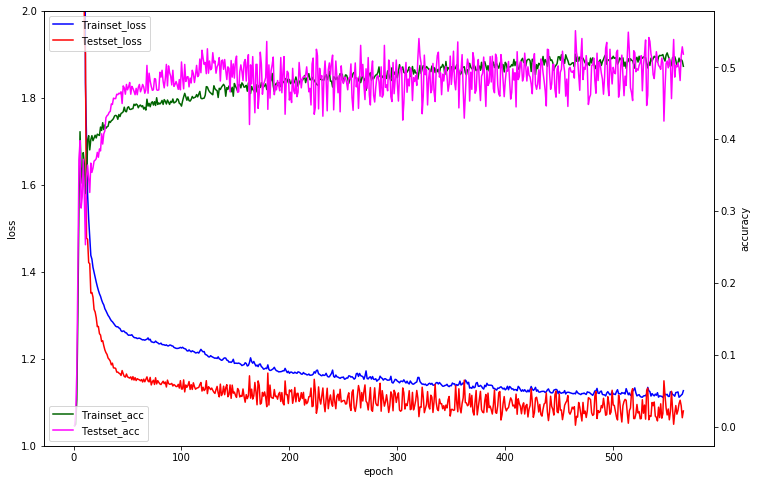

In [32]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
fig, ax0 = plt.subplots(figsize=(12,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c="blue", label='Trainset_loss')
ax0.plot(x_len, y_vloss, c="red", label='Testset_loss')
ax0.set_ylim([1,2])
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='upper left')
ax1.legend(loc='lower left')
plt.show()